# Linear Models in Machine Learning on Python - Logistic Regression 3 

Welcome to the third notebook about Logistic Regression. In this notebook we will extend the idea of Logistic Regression for multiclass classification.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore', module='sklearn')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

Previously I talked about Logistic Regression as a  binary classification algorithm. However, there are some strategies that we can use to transform this algorithm into a multiclass classification algorithm. Let's explore this strategies.

### 1. **One-vs-all**

One-vs-all strategy (a.k.a One-vs-rest) involves splitting our labels into distinct binary classification problems. In each binary classification problem, we pick one of the classes, then we exclude all the others in another class and train the model on this binary problem. Afterwards, we iterate the algorithm and pick another class and fit the model against all the other classes again. We do this for the number of classes times. For instance let's say we are trying to predict whether or not a food is sweet, sour, or bitter. We will have the following logistic regression models (Sweet,(Sour,Bitter)), (Sour,(Sweet,Bitter)), (Bitter,(Sour,Sweet)). In each iteration, we treat one of the classes as positive and the other as negative. After we finish this training step, we will have three different probability values returned by these logistic regression classifiers. While making predictions we use the class that maximizes the probability of a given instance. In other words, we will run the three classifiers again on the new instance and assign the instance to the class which gives us the highest probability for that instance. 


### 2. **One-vs-one**

The one-vs-one strategy involves splitting our labels into distinct binary classification problems like the one-vs-all strategy. The difference is that instead of training one class against the rest every iteration, one-vs-one strategy involves training one distinct classifier for each class versus every other class. In the end, we get a probability value for each class against the other. For instance, let's get back to our Sweet/Sour/Bitter Classification, In the one-vs-one strategy, we would get classifiers trained on the following subsets (Sweet,Bitter),(Sweet,Sour) and (Sour,Bitter). Although we get the same number of classifiers for the number of classes. The number of classifiers we need in a one-vs-one strategy is normally different than the one in one-vs-all. We can find the number of classifiers we need by using the following equation

$$\frac{num_{classes}\cdot \left(num_{classes}-1\right)}{2}$$

In this one-vs-one classification strategy we also use another way for predicting the label. While predicting we use all of the classifiers that we trained on the instance then we assign this instance to the class with majority output. For instance, for the predictor x, the classifiers give the following output


(Sweet,Bitter)=Sweet

(Sweet,Sour)=Sour


(Sour,Bitter)=Sour

Then we assign x to Sour class since it is the label with majority. This is actually called a voting classifier and I will talk more about them when I introduce decision trees.

Moreover, It's recommended to use Logistic Regression with one-vs-all strategy whereas one-vs-one with Support Vector Machines. In general case, one-vs-one strategy creates lots of classifiers and this may be a problem when we have high number of classes. On the other hand, some algorithms like Support Vector Machines have scaling problem when size of the training set is high, in this case One-vs-one strategy is preferred. Additionally, one-vs-all strategy may create imbalanced target variables since we will be getting together all the other classes except one. I recommend reading this discussion about these strategies on Stackoverflow [link](https://stats.stackexchange.com/questions/91091/one-vs-all-and-one-vs-one-in-svm)

I also recommend reading the following MachineLearningMastery tutorial [One-vs-Rest and One-vs-One for Multi-Class Classification](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/)

## One-vs-all Classification with Wine Dataset

I wanted to start with a basic dataset that we  can use for multiclass classification. I will use sklearn to load the dataset and then train logistic regression model. It will be a lot similar to training a binary logistic regression model. 

In [2]:
from sklearn.datasets import load_wine
data = load_wine()

In [3]:
list(data.keys())

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']

Firstly, let's create a dataframe by using the keys.

In [4]:
predictors=pd.DataFrame(data.data,columns=data.feature_names)
predictors.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Let's also get our target feature.

In [5]:
target=data.target

C:\Users\gorke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

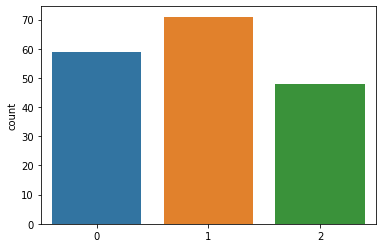

In [6]:
sns.countplot(target)

We don't have much class imbalance problem, therefore we can count on accuracy since there is not a big imbalance.

For training I will use `GridSearchCV()`, `train_test_split()` and `LogisticRegression()` functions. There is almost no difference here compared to previous notebook, expect that, I will add **multi_class** parameter to LogisticRegression().

In [7]:
logreg = LogisticRegression(multi_class="ovr") # ovr stands for one-vs-rest

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 42,stratify = target)

In [9]:
params = {
    'C':[100, 10, 1.0, 0.1, 0.01],
    'l1_ratio': [0.25,0.50, 0.75, 0.90],
    'penalty': ["l2","l1","elasticnet"],
    'fit_intercept':[True,False],
    'warm_start':[True,False],
    
}


In [10]:
from sklearn.model_selection import GridSearchCV
gscv=GridSearchCV(logreg, params, cv=5,verbose=2,scoring="accuracy")

In [ ]:
model=gscv.fit(X_train, y_train)

In [12]:
predict_ovr=gscv.predict(X_test)

In [13]:
accuracy_score(predict_ovr,y_test)

0.9722222222222222

The accuracy score is pretty high. Let's now turn our attention to calculating other metrics, things will get a bit messy right now. It was pretty easy to calculate Recall, Precision and other metrics when we only have two classes. It's a bit more harder when we are dealing with multiclass classification. The formula that I shared in the first notebook still applies to the multiclass case, however, calculating TP,TN,FP and FN are a bit harder.

Let's get started with plotting our confusion matrix.

In [14]:
def plot_confusion(y,y_pred):
    plt.figure(figsize=(10, 7))
    cm=confusion_matrix(y, y_pred)
    sns.heatmap(cm,annot=True, fmt='d');

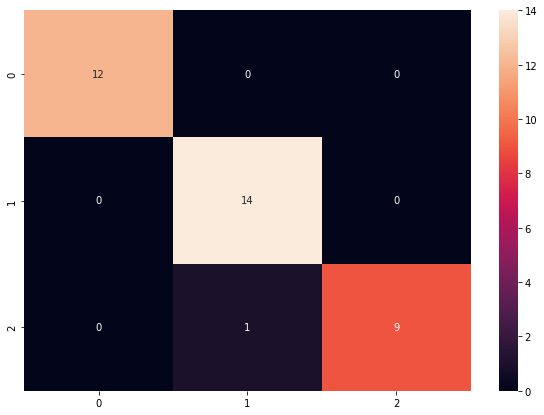

In [15]:
plot_confusion(y_test,predict_ovr)

Firstly, I will manually computer the metrics. I was thinking of explaning how to compute them manually in this part but I came across with two well-written medium articles on how to calculate metrics in multiclass case.

I will share these medium articles and I recommend reading them even if you know how to calculate the metrics in multiclass case because one of the articles questions how careful we should be in some cases while using F1-Score. 

[Multi-Class Metrics Made Simple, Part I: Precision and Recall](https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2)

[Multi-Class Metrics Made Simple, Part II: the F1-score](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1)

In [16]:
def get_metrics(y,predicty,target):
    cm=confusion_matrix(y,predicty)
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
 
    TPR = TP/(TP+FN) #Recall
    PPV = TP/(TP+FP)# Precision
    FPR = FP/(FP+TN)# Fall out
    F1=2*(TPR*PPV)/(TPR+PPV)
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    # Calculating Micro Averages
    TPR=np.append(TPR,(TP[0]+TP[1]+TP[2])/(TP[0]+TP[1]+TP[2]+FN[0]+FN[1]+FN[2]))
    PPV=np.append(PPV,(TP[0]+TP[1]+TP[2])/(TP[0]+TP[1]+TP[2]+FP[0]+FP[1]+FP[2]))
    FPR=np.append(FPR,(FP[0]+FP[1]+FP[2])/(TN[0]+TN[1]+TN[2]+FP[0]+FP[1]+FP[2]))
    F1 = np.append(F1,(TP[0]+TP[1]+TP[2])/((TP[0]+TP[1]+TP[2])+1/2*(FN[0]+FN[1]+FN[2]+FP[0]+FP[1]+FP[2])))
    df =pd.DataFrame([PPV, TPR, FPR,F1])
    df=df.T
    df.set_axis(["Precision","Recall","Fall-out","F1-Score"],axis=1,inplace=True)
    df.set_axis(np.concatenate((np.array(np.unique(target)),["MicroAvg"])),axis=0,inplace=True)


    return df

In [17]:
get_metrics(y_test,predict_ovr,target)

,Precision,Recall,Fall-out,F1-Score
0,1.000000,1.000000,0.000000,1.000000
1,0.933333,1.000000,0.045455,0.965517
2,1.000000,0.900000,0.000000,0.947368
MicroAvg,0.972222,0.972222,0.013889,0.972222


When we talked about the strategy of Logistic Regression in Multiclass classification, we learnt that we will actually train 3 different classifiers (in the case of OvR). That's why, we also get 3 different precision,recall and fall-out scores. However, we can use some techniques to get average of these scores. I generally prefer taking Micro Average, but you can also use Macro Average or Weighted Average. You can learn more about calculating these Averages by reading the articles below.

[Micro and Macro Averages for imbalance multiclass classification](https://androidkt.com/micro-macro-averages-for-imbalance-multiclass-classification/)
[Micro, Macro & Weighted Averages of F1 Score, Clearly Explained](https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f#2f35)

I have been using this `get_metrics()` function for quite a while and even though I'm sure I have taken this code from somewhere, I don't know exactly from which website I took it. However, I found a stackoverflow discussion in which you can find very similar solution to calculating metrics (I probably took the code from this discussion but I'm not sure) [link](https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-multi-class-data-in-py).

Actually you don't have to define any function to do all the calculations. There is a function called `classification_report()` that you can use to calculate almost the same metrics above.

## Precision-vs-Recall Curve and ROC Curve for Multiclass Classification

I previously talked about that these plots are for binary classification, however, just like we get precision or recall scores for each classifier we can also plot precision-vs-recall or roc curve for these classifiers. Another approach is plotting micro-averaged version so that we can precision-recall or roc curve that showes the overall performance. I will plot both of them. To practice you may try plotting a macro-averaged one.

For the code below, I mainly used that [documentation](https://scikit-learn.org/0.15/auto_examples/plot_roc.html#:~:text=In%20order%20to%20extend%20ROC,prediction%20(micro%2Daveraging).) of scikit-learn but I updated some part to make the plots more fashionable.

To plot the curves we need to get on top of one problem first. The target feature is in a multiclass structure whereas we need it to be in a binary one fashion. We will use a function called `labelbinarizer()` to convert our target into a binary fashion. Moreover, we also need to convert test set since we will also use it for calculating metrics. In general, it can be good to use labelbinarizer on target feature and then do `train_test_split()` again so that we can get binarized versions of y_train and y_test easily. I also recommend checking out this documentation in which you can find more about plotting multiclass ROC Curve. [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

In [18]:
from sklearn.preprocessing import label_binarize
fpr = dict()
tpr = dict()
th  = dict()
roc_auc = dict()

y_score=label_binarize(predict_ovr, classes=[0, 1, 2])
y_test_binarized=label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_score.shape[1] 


for i in range(n_classes):
    fpr[i], tpr[i], th[i] = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

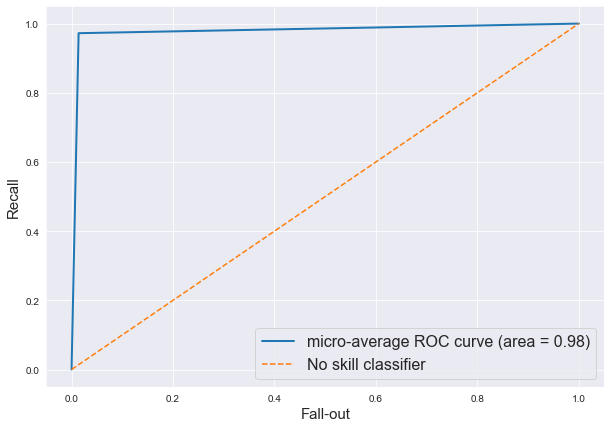

In [19]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(10, 7))
# Plot ROC curve
sns.set_style("darkgrid")
ax=sns.lineplot(x=fpr["micro"], y=tpr["micro"] ,linewidth = 2,label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
sns.lineplot(x=[0, 1], y=[0, 1],label="No skill classifier",linestyle="dashed")
ax.set_xlabel("Fall-out",fontsize=15)
ax.set_ylabel("Recall",fontsize=15)
plt.legend(loc="lower right",prop={'size': 16})

In a similar fashion let's also plot ROC Curve for all the classifiers.
            

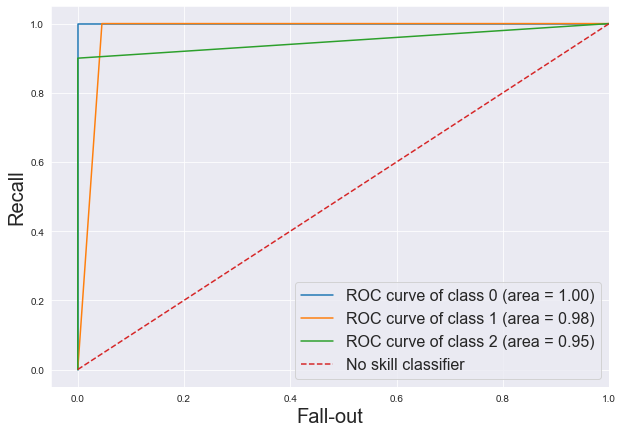

In [20]:
plt.figure(figsize=(10, 7))
# Plot ROC curve
sns.set_style("darkgrid")

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))
sns.lineplot(x=[0, 1], y=[0, 1],label="No skill classifier",linestyle="dashed")    
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel("Fall-out",fontsize=20)
plt.ylabel("Recall",fontsize=20)
plt.legend(loc="lower right",prop={'size': 16})


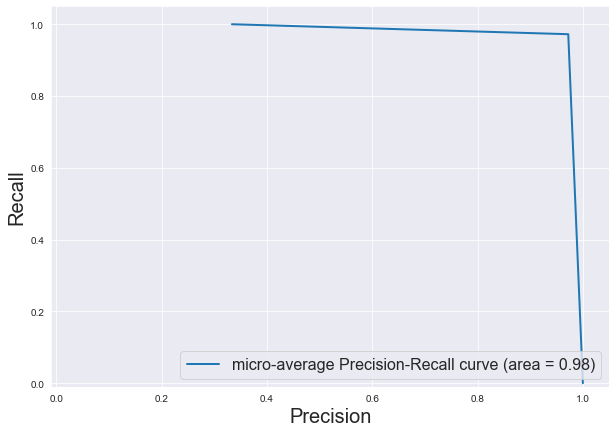

In [21]:
# precision recall curve
prevsrec_auc=dict()
precision = dict()
recall = dict()
th = dict()

plt.figure(figsize=(10, 7))
sns.set_style("darkgrid")

precision["micro"], recall["micro"], th["micro"] = precision_recall_curve(y_test_binarized.ravel(), y_score.ravel())
prevsrec_auc["micro"] = auc(recall["micro"], precision["micro"])

plt.plot(precision["micro"], recall["micro"], lw=2, label='micro-average Precision-Recall curve (area = {0:0.2f})'
               ''.format(prevsrec_auc["micro"]))
    
plt.xlim([-0.01, 1.05])
plt.ylim([-0.01, 1.05])
plt.xlabel("Precision",fontsize=20)
plt.ylabel("Recall",fontsize=20)
plt.legend(loc="lower right",prop={'size': 16})

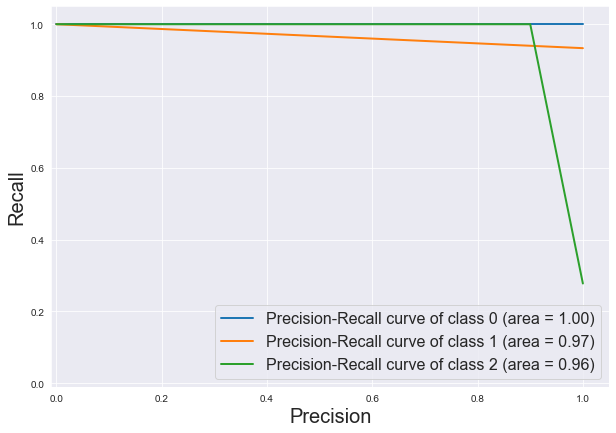

In [22]:
# precision recall curve
prevsrec_auc=dict()
precision = dict()
recall = dict()
th = dict()
plt.figure(figsize=(10, 7))
sns.set_style("darkgrid")
for i in range(n_classes):
    precision[i], recall[i], th[i] = precision_recall_curve(y_test_binarized[:, i],
                                                        y_score[:, i])
    prevsrec_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], lw=2, label='Precision-Recall curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, prevsrec_auc[i]))
    
plt.xlim([-0.01, 1.05])
plt.ylim([-0.01, 1.05])
plt.xlabel("Precision",fontsize=20)
plt.ylabel("Recall",fontsize=20)
plt.legend(loc="lower right",prop={'size': 16})

Let's merge all of these function into one function so that we can use anyone when we need.

In [23]:
def onefunctiontoplothemall(y_predicted,y,plot_type):
    fpr = dict()
    tpr = dict()
    th  = dict()
    roc_auc = dict()
    
    y_score=label_binarize(y_predicted, classes=[0, 1, 2])
    y_test_binarized=label_binarize(y, classes=[0, 1, 2])
    n_classes = y_score.shape[1] 
    
    if(plot_type=="microavg_roc"):
        
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        plt.figure(figsize=(10, 7))
        # Plot ROC curve
        sns.set_style("darkgrid")
        ax=sns.lineplot(x=fpr["micro"], y=tpr["micro"] ,linewidth = 2,label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]))
        sns.lineplot(x=[0, 1], y=[0, 1],label="No skill classifier",linestyle="dashed")
        ax.set_xlabel("Fall-out",fontsize=15)
        ax.set_ylabel("Recall",fontsize=15)
        plt.legend(loc="lower right",prop={'size': 16})
    
    
    if(plot_type=="roc"):
        plt.figure(figsize=(10, 7))
        # Plot ROC curve
        sns.set_style("darkgrid")


        for i in range(n_classes):
                ax = plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))
        

        sns.lineplot(x=[0, 1], y=[0, 1],label="No skill classifier",linestyle="dashed")    
        plt.xlim([-0.05, 1.0])
        plt.ylim([-0.05, 1.05])
        plt.xlabel("Fall-out",fontsize=20)
        plt.ylabel("Recall",fontsize=20)
        plt.legend(loc="lower right",prop={'size': 16})
    
    if(plot_type=="precisionvsrecall_microavg"):
        
        # precision recall curve
        prevsrec_auc=dict()
        precision = dict()
        recall = dict()
        th = dict()

        plt.figure(figsize=(10, 7))
        sns.set_style("darkgrid")

        precision["micro"], recall["micro"], th["micro"] = precision_recall_curve(y_test_binarized.ravel(), y_score.ravel())
        prevsrec_auc["micro"] = auc(recall["micro"], precision["micro"])

        plt.plot(precision["micro"], recall["micro"], lw=2, label='micro-average Precision-Recall curve (area = {0:0.2f})'
                       ''.format(prevsrec_auc["micro"]))
    
        plt.xlim([-0.01, 1.05])
        plt.ylim([-0.01, 1.05])
        plt.xlabel("Precision",fontsize=20)
        plt.ylabel("Recall",fontsize=20)
        plt.legend(loc="lower right",prop={'size': 16})
    if(plot_type=="precisionvsrecall"):
        # precision recall curve
        prevsrec_auc=dict()
        precision = dict()
        recall = dict()
        th = dict()
        plt.figure(figsize=(10, 7))
        sns.set_style("darkgrid")
        for i in range(n_classes):
            precision[i], recall[i], th[i] = precision_recall_curve(y_test_binarized[:, i],
                                                        y_score[:, i])
            prevsrec_auc[i] = auc(recall[i], precision[i])
            plt.plot(recall[i], precision[i], lw=2, label='Precision-Recall curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, prevsrec_auc[i]))
    
        plt.xlim([-0.01, 1.05])
        plt.ylim([-0.01, 1.05])
        plt.xlabel("Precision",fontsize=20)
        plt.ylabel("Recall",fontsize=20)
        plt.legend(loc="lower right",prop={'size': 16})


## One-vs-one Classification with Wine Dataset

Using one-vs-one strategy with `LogisticRegression()` is sort of different than using one-vs-all strategy. We can use one-vs-all strategy easily by just passing a parameter to `LogisticRegression()` function. However, to use One-vs-One strategy we need to use another function called `OnevsOneClassifier()`.

In [24]:
from sklearn.multiclass import OneVsOneClassifier

We will pass `LogisticRegression()` as a parameter to `OnevsOneClassifier()`.

In [25]:
logreg_onevsone=OneVsOneClassifier(logreg)

Now I will use gridsearchCV but there is a step that we need to be careful here, since we are using LogisticRegression() inside OneVsOneClassifier()  we cannot pass **params** argument as we did before. We will add **estimator__** to specify that we are using gridsearch for estimator (in our case LogisticRegression function).

In [26]:
from sklearn.model_selection import GridSearchCV

In [217]:
params = {
    'estimator__C':[100, 10, 1.0, 0.1, 0.01],
    'estimator__l1_ratio': [0.25,0.50, 0.75, 0.90],
    'estimator__penalty': ["l2","l1","elasticnet"],
    'estimator__fit_intercept':[True,False],
    'estimator__warm_start':[True,False],
    
}
from sklearn.model_selection import GridSearchCV
gscv_ovo=GridSearchCV(logreg_onevsone, params, cv=5,verbose=2,scoring="accuracy")

In [ ]:
gscv.fit(X_train,y_train)

In [219]:
predic_ovo=gscv.predict(X_test)

In [221]:
accuracy_score(y_test,predic_ovo)

0.9722222222222222

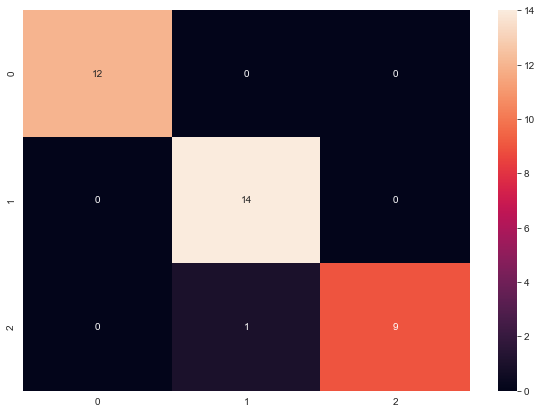

In [222]:
plot_confusion(y_test,predic_ovo)

In [224]:
get_metrics(y_test,predic_ovo,target)

,Precision,Recall,Fall-out,F1-Score
0,1.000000,1.000000,0.000000,1.000000
1,0.933333,1.000000,0.045455,0.965517
2,1.000000,0.900000,0.000000,0.947368
MicroAvg,0.972222,0.972222,0.013889,0.972222


## A discussion on multiclass Curves

In this part, there is a note that I would like to add here before moving on softmax regression. If you read the documentation that I shared for multiclass ROC Curve, you probably saw there is a bit different strategy used in that documentation. I used GridSearchCV() and then binarized the the labels returned from predict() function. In the documentation however, the author firstly binarizes the target feature then uses OnevsAllClassifier() to train a model on that binarized target. The problem in our case is that we cannot use a binarized feature as our target class in LogisticRegression since the shape of target must be  (n_classes, ) whereas after binarization we get a target feature that has the shape (n_classes,(n_classes). To deal with this problem we can use the strategy below.

In [279]:
y = target
y = y.astype(np.uint8)
n_classes = len(set(y))

Y = label_binarize(target, classes=[0,1,2])
X_train, X_test, y_train, y_test=train_test_split(predictors, Y, test_size = 0.2, random_state = 42,stratify = target)

I binarized the target. Let's see how it looks.

In [280]:
y_test

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [ ]:
logreg=LogisticRegression()

We previously used `OneVsOneClassifier()` since we cannot directly use its strategy with `LogisticRegression()`. There is another function called `OneVsRestClassifier()` which we can use for applying One-vs-Rest strategy. The good part is that even though we cannot use a (n_classes,(n_classes) shape matrix inside `LogisticRegression()` we can use it with `OneVsRestClassifier()`. This will be our way out for strategy that firstly binarizing the data and then training it.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
params = {
    'estimator__C':[100, 10, 1.0, 0.1, 0.01],
    'estimator__l1_ratio': [0.25,0.50, 0.75, 0.90],
    'estimator__penalty': ["l2","l1","elasticnet"],
    'estimator__fit_intercept':[True,False],
    'estimator__warm_start':[True,False],
    
}
logreg = LogisticRegression() 
gscv=GridSearchCV(OneVsRestClassifier(logreg), params, cv=5,verbose=2,scoring="accuracy")

model=gscv.fit(X_train, y_train)

In [282]:
prediction1=gscv.predict(X_test)
prediction1=label_binarize(prediction1,classes=[0,1,2])
y_test=label_binarize(y_test,classes=[0,1,2])

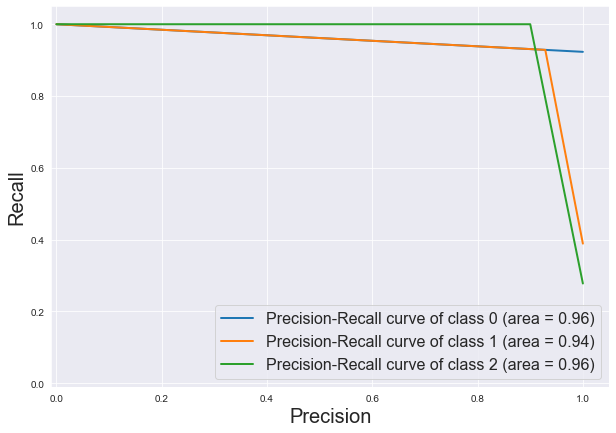

In [283]:
# precision recall curve
prevsrec_auc=dict()
precision = dict()
recall = dict()
th = dict()
plt.figure(figsize=(10, 7))
sns.set_style("darkgrid")
for i in range(n_classes):
    precision[i], recall[i], th[i] = precision_recall_curve(y_test[:, i],
                                                        prediction1[:, i])
    prevsrec_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], lw=2, label='Precision-Recall curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, prevsrec_auc[i]))
    
plt.xlim([-0.01, 1.05])
plt.ylim([-0.01, 1.05])
plt.xlabel("Precision",fontsize=20)
plt.ylabel("Recall",fontsize=20)
plt.legend(loc="lower right",prop={'size': 16})

Let's also use the other strategy that firstly training the model and then binarizing the output.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 42,stratify = target)

params = {
    'estimator__C':[100, 10, 1.0, 0.1, 0.01],
    'estimator__l1_ratio': [0.25,0.50, 0.75, 0.90],
    'estimator__penalty': ["l2","l1","elasticnet"],
    'estimator__fit_intercept':[True,False],
    'estimator__warm_start':[True,False],
    
}


logreg = LogisticRegression() 
gscv=GridSearchCV(OneVsRestClassifier(logreg), params, cv=5,verbose=2,scoring="accuracy")

model=gscv.fit(X_train, y_train)

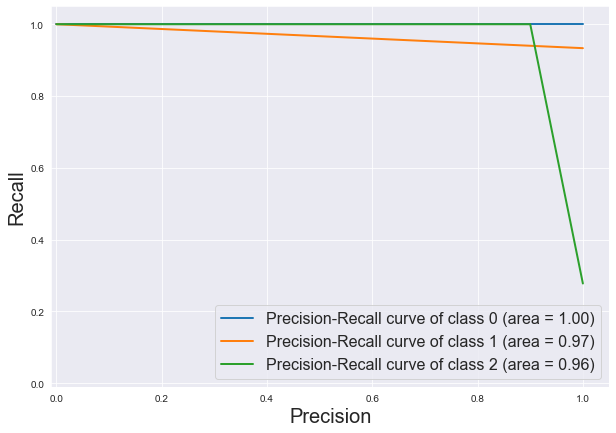

In [278]:
onefunctiontoplothemall(prediction2,y_test,"precisionvsrecall")

The thing probably you notice is that when we used binarized target feature for training we get lower AUC scores. I don't know why exactly this is happening but I think when we used the binarized version, the algorithm  doesn't perform as well as it performs when we have a flattened target. Moreover, using binarization step after training the algorithm is not a problem I think, I remember myself trying to search this on the internet but I guess I couldn't find anything because I would take a note of it If I did. You can use the both ways, and see which one works better for your problem.

## Multinomial Logistic Regression

There is another version of Logistic Regression called Multinomial Logistic Regression or Softmax Regression ( I prefer calling it Softmax Regression) that we can use for multiclass classification. Softmax Regression is an important algorithm not only because of that it extends the idea of logistic regression to multiclass classification but also because of that it is important for deep learning. The cost function that we will learn here has many applications in deep learning as well.

Let's get started.

1. In softmax regression we firstly compute softmax score vector which holds the linear combinations. We compute this score for each class in our target variable.

$$\left(x\right)\:=\:x^T\theta :^k$$

2. Then we will use softmax function to compute probability.
$$P_k=softmax\left(z\left(x\right)\right)_k=\frac{exp\left(z_k\left(x\right)\right)}{\sum _{k=1}^K exp\left(z_k\left(x\right)\right)}=\frac{exp\left(x^T\theta ^k\right)}{\sum_{k=1}^K exp\left(x^T\theta ^{^k}\right)}$$

The softmax function estimates probability for each class in our target, to do that, it uses the softmax score or simply the linear combination that we have calculated by using the weights and bias term. In the numerator we calculate the linear combination for each class and then in the denominator we divide the score we calculated by the sum of all the $exp\left(z_n\left(x\right)\right)$ scores that is calculated. If you remember my notes about scaling you will notice that here we are actually doing normalization. This model is also known as normalized exponential (This may be a bit irrelevant but here actually we are calculating log-odds, for learning about more watch the [video1](https://www.youtube.com/watch?v=ARfXDSkQf1Y) and [video2](https://www.youtube.com/watch?v=fJ53tIDbvTM).Instead of using the probability values to assign our instance to binary classes (we were doing that in logistic regression) here we are just getting the probability values. Moreover, since the output from softmax function will follow a probability distribution, this vector sums up to 1. 

In this part, reading some additional sources can be good. I recommend reading the following two articles
1. [Maths Behind ML- Multinomial Logistic Regression](https://ravedata.in/machine-learning/maths-multinomial-logistic-regression/)
2. [The Softmax Function, Simplified](https://towardsdatascience.com/softmax-function-simplified-714068bf8156)

You can skip the optimization part in the first article and focus on the algorithm. Moreover, this video may be a bit advanced but I also recommend watching ritvikmath's video on Softmax [link](https://www.youtube.com/watch?v=8ps_JEW42xs)

### Cost Function

Our goal is to maximize the probability that we get from our model for the target class and get a relatively low probability for the other classes. To do that, we need a cost function so that we can train and adjust the weights we have in our softmax function. The cost function that is used for Softmax Regression is called Cross-Entropy and it is defined as

$$J\left(Θ\right)=-\frac{1}{m}\sum _{i=1}^m\:\sum _{k=1}^K\:\left(y_k^ilog\left(\hat p^i_k\right)\right)$$ 

In the equation, $y_k^i$ is the target probability that the i-th instance belongs to class k. Moreover, omega represents the parameter matrix.

Cross entopy calculates the distance between the probabilities obtained from softmax and the truth table of our target. Let's see how it works in the case of our wine classification, 

we have 3 classes (0,1,2), imagine, softmax calculated the probabilities below, as you can see in the first matrix second class has the highest probability but in our truth table the class is the third one. We will use cross entropy to calculate the distance between these two matrix so that we can optimize our weights to maximize the probability for the desired (in this case third) class.

$$\begin{pmatrix}0.38\\ 0.47\\ 0.15\end{pmatrix}===>\begin{pmatrix}0\\ 0\\ 1\end{pmatrix}$$

Cross entropy can sound a bit unusual to you but actually we have been using it almost from the beginning of logistic regression notebooks because the cost function that we used for logistic regression, namely log loss, is actually the version of cross entropy function when we have only 2 classes.

$$J\left(\theta\right)=-\frac{1}{m}\left[\sum _{i=1}^m\:y^{\left(i\right)}log\left(h_{\theta }\left(x^{\left(i\right)}\right)\right)+\left(1-y^{\left(i\right)}\right)log\left(1-h_{\theta }\left(x^{\left(i\right)}\right)\right)\right]$$

Instead of using the general cost function formula for cross entropy, in logistic regression for binary classification we use the above formula which give us probability of one of the targets we can. When we have our label is 0 we get rid of the first part of the equation and when it is 1 we get rid of the second part. Therefore, in the end we are still calculating cross-entropy, by extension of this, actually we are calculationg entropy. However, it is more interpretable to use the generic form above in the binary case. 

1. For more about these cost functions, I can recommend checking this discussion [Multinomial Logistic Loss vs (Cross Entropy vs Square Error)](https://stats.stackexchange.com/questions/166958/multinomial-logistic-loss-vs-cross-entropy-vs-square-error). 
2.  There is also a good proof video for equivalance of cross entropy and log-loss but this may be a bit advanced because here one needs to know more formal definition of cross entropy which you can find on [Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy). I recommend checking out the video after spending some time in all of the links in this part [video](https://www.youtube.com/watch?v=sKxQQYVGmfE) you can also find the notes in that video [link](https://users.cs.duke.edu/~cynthia/CourseNotes/CrossEnt.pdf).
3. There are three good discusions in which you can appreciate more the similarity between log loss and cross entropy [The cross-entropy error function in neural networks](https://datascience.stackexchange.com/questions/9302/the-cross-entropy-error-function-in-neural-networks), [Cross-entropy loss explanation](https://datascience.stackexchange.com/questions/20296/cross-entropy-loss-explanation) and [How is logistic loss and cross-entropy related?](https://math.stackexchange.com/questions/1074276/how-is-logistic-loss-and-cross-entropy-related).
4. Lastly, I will also provide 3 comprehensive guide to Cross Entopy. Firstly watch Aurélien Géron's awesome video on this subject ( I took a lot of help from his book) [link](https://www.youtube.com/watch?v=ErfnhcEV1O8). Then read the article on Machine Learning Mastery [link](https://machinelearningmastery.com/cross-entropy-for-machine-learning/) and finally read though that awesome github post [link](https://gombru.github.io/2018/05/23/cross_entropy_loss/)




### Optimization

Okay now let's turn our attention to optimizing the cost function. There are different algorithms that can be used to optimize cross entropy. Here I will write an equation for gradient vector and by using this gradient vector we can use the update rule in the first notebook. If you firstly want to know what is a gradient or gradient vector (more formally I like calling it Jacobian matrix) check the [link](https://machinelearningmastery.com/gradient-in-machine-learning/)

$$∇_{θ^k}J\:\left(Θ\right)=\frac{1}{m}\sum _{i=1}^m\:\left(\hat p_k^i-y_k^i\right)x^i$$

Here I will share some links that you can find how we get this gradient vector formula.
    [How do you take the gradient vector of the cross entropy cost function?](https://math.stackexchange.com/questions/2852620/how-do-you-take-the-gradient-vector-of-the-cross-entropy-cost-function) Here you can find a very good mathematical explanation for deriving the equation above. Moreover, in this [article](https://deepnotes.io/softmax-crossentropy) you can find derivation of cost function as well as derivation of softmax function. Lastly, you can check this [article](https://jmlb.github.io/ml/2017/12/26/Calculate_Gradient_Softmax/) too but it is in more deep learning fashion so you may skip it.



Some additional articles
1. [Cross Entropy Loss VS Log Loss VS Sum of Log Loss](https://leimao.github.io/blog/Conventional-Classification-Loss-Functions)
2. [Logistic classification with cross-entropy (1/2)](https://peterroelants.github.io/posts/cross-entropy-logistic/)
3. [Softmax classification with cross-entropy (2/2)](https://peterroelants.github.io/posts/cross-entropy-softmax/)
4. [To Study Implementation of Gradient Descent for Multi-class Classification Using a SoftMax Regression and Neural Networks](https://rstudio-pubs-static.s3.amazonaws.com/337306_79a7966fad184532ab3ad66b322fe96e.html)
5. [Intuitively Understanding the Cross Entropy Loss](https://www.youtube.com/watch?v=Pwgpl9mKars)
5. In this article you can find a brief and non-mathmetical explanation for softmax regression [link](https://dataaspirant.com/multinomial-logistic-regression-model-works-machine-learning/)
6. This article provides a very well-written explanation for binary cross entropy, check it out [link](https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e)
7. In this article you can find a good illustrated explanation for Cross Entropy [link](https://www.insideaiml.com/blog/Binary%0ACross-Entropy-1038)

For more aboutBinary cross entroy [link](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

Finally for almost all the idea behind logistic regression check out this document from Stanford University [link](https://web.stanford.edu/~jurafsky/slp3/5.pdf)

Let's use Softmax Regression.

In [82]:
softmaxreg=LogisticRegression(multi_class="multinomial",max_iter=50)

We are using the same function that we used before, however, we set the parameter multi_class to multinomial. Now let's use train and test split.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 42,stratify = target)

In [45]:
params = {
    'C':[100, 10, 1.0, 0.1, 0.01],
    'l1_ratio': [0.25,0.50, 0.75, 0.90],
    'penalty': ["l2","l1","elasticnet"],
    'fit_intercept':[True,False],
    'warm_start':[True,False],
    
}

In [ ]:
from sklearn.model_selection import GridSearchCV
gscv=GridSearchCV(softmaxreg, params, cv=5,verbose=2,scoring="accuracy")
model2=gscv.fit(X_train, y_train)

Let's see how it performs.

In [84]:
accuracy_score(y_test,model2.predict(X_test))

0.9722222222222222

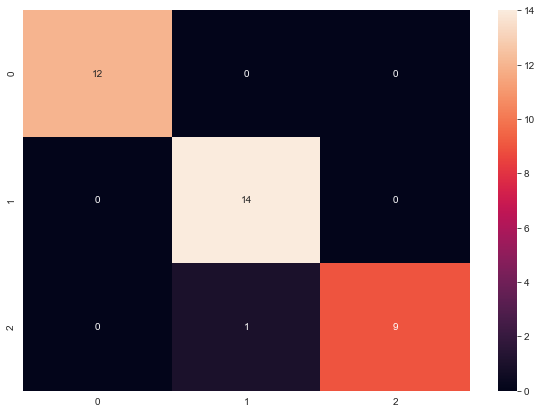

In [53]:
plot_confusion(y_test,gscv.predict(X_test))

WE ARE DONE!! In the following notebook we will focus on more applications and leave the theory for a while.